In [136]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import matplotlib.pyplot as plt
import seaborn as sns

# Question 8

In [3]:
# setup
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [8]:
X = MS(['horsepower']).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [10]:
# results.summary()

In [12]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = MS(['horsepower']).fit_transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [13]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([24.46707715])

In [14]:
new_predictions.conf_int(alpha=0.05) # confidence intervals

array([[23.97307896, 24.96107534]])

In [180]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

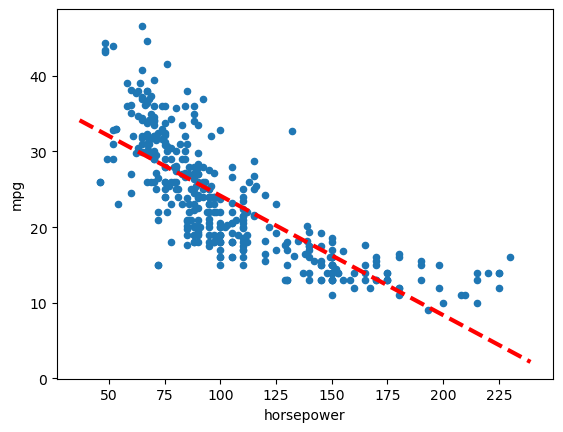

In [18]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, 
       results.params[0], # gradient
       results.params[1], # intercept
       'r--',
       linewidth=3)

### Residual Plot

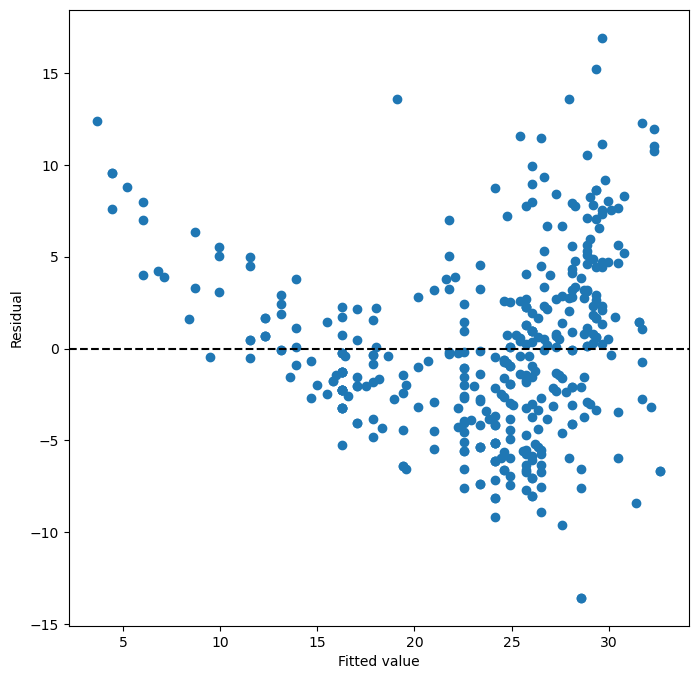

In [19]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Leverage

115

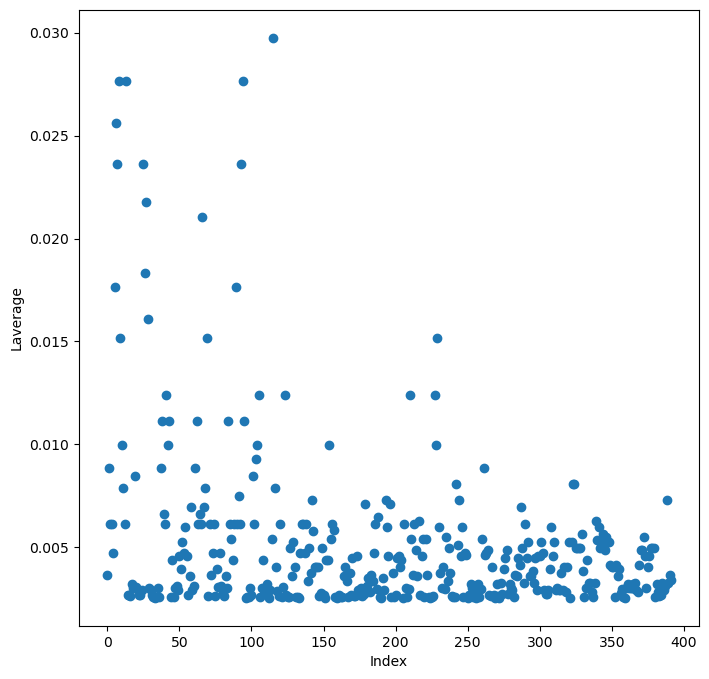

In [20]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Laverage')
np.argmax(infl.hat_matrix_diag) #index of largest leverage

# Question 9

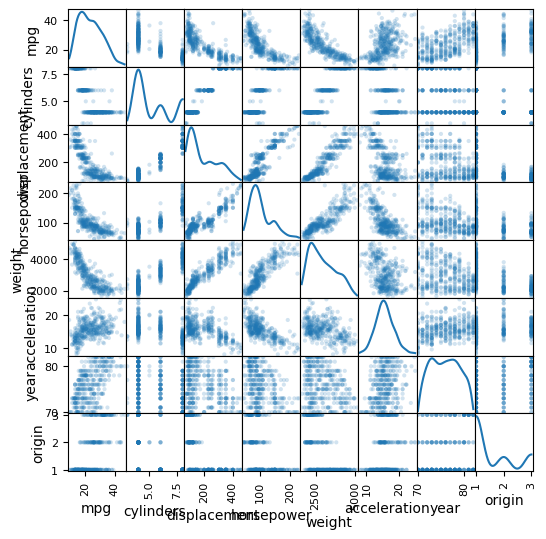

In [27]:
pd.plotting.scatter_matrix(Auto, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [28]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [32]:
terms = Auto.columns.drop(['mpg', 'name'])

In [35]:
X = MS(terms).fit_transform(Auto)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [38]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


### Residual and Leverage Plots

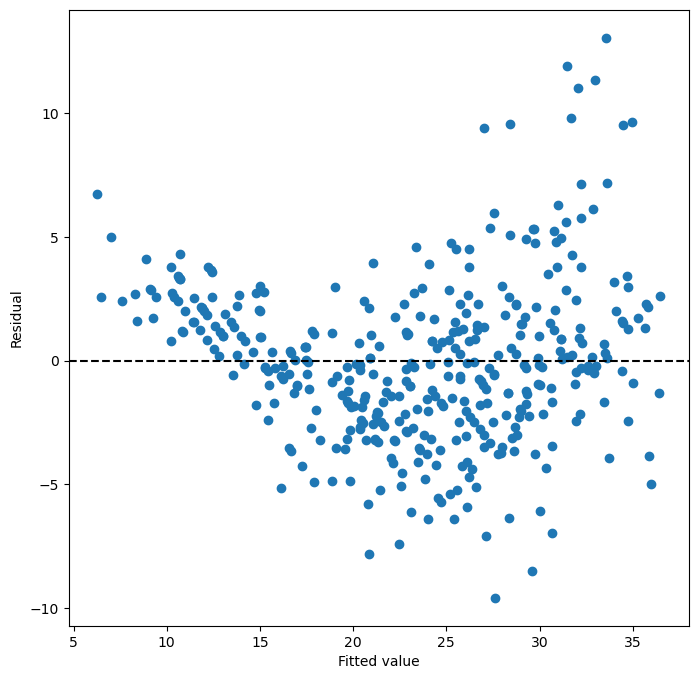

In [40]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues , results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

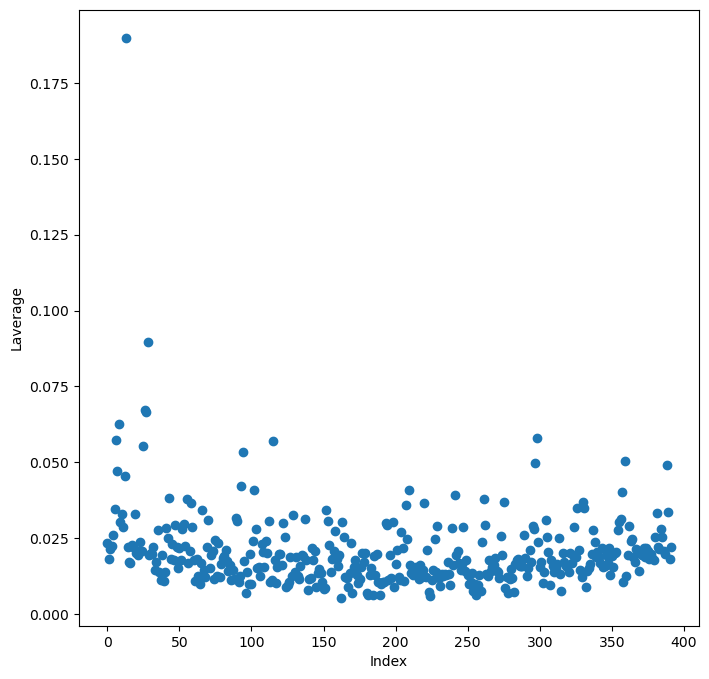

In [41]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Laverage')
np.argmax(infl.hat_matrix_diag) #index of largest leverage

### Interaction Terms

In [43]:
X = MS([('horsepower', 'year')]).fit_transform(Auto)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,40.4514,0.802000,50.463,0.0
horsepower:year,-0.0022,0.000096,-22.435,0.0


In [45]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     503.3
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           3.46e-72
Time:                        19:14:25   Log-Likelihood:                -1198.7
No. Observations:                 392   AIC:                             2401.
Df Residuals:                     390   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          40.4514      0.802     50.463      0.000      38.875      42.027
horsepower:year    -0.0022   9.62e-05    -22.435      0.000      -0.002      -0.002
==============================================================================
Omnibus:                       15.299   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.044
Skew:                           0.487   Prob(JB):                     0.000328
Kurtosis:                       3.180   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Transformations

In [59]:
X = MS([poly('horsepower', degree=2)]).fit_transform(Auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()

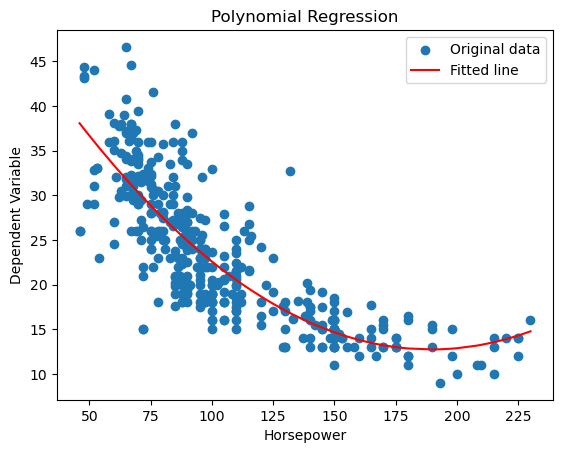

In [60]:
# Sort horsepower and predicted values for plotting
sorted_order = np.argsort(horsepower[:,0])
sorted_horsepower = horsepower[sorted_order]
sorted_predictions = results3.predict(X)[sorted_order]

plt.scatter(horsepower, y, label='Original data')
plt.plot(sorted_horsepower, sorted_predictions, color='red', label='Fitted line')
plt.xlabel('Horsepower')
plt.ylabel('Dependent Variable')  # Replace with your dependent variable name
plt.legend()
plt.title('Polynomial Regression')
plt.show()

# Question 10

In [75]:
# setup
Car = load_data("Carseats")
Car.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [77]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Car)
y = Car['Sales']
model_1 = sm.OLS(y, X)
results = model_1.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [81]:
X = MS(['Price', 'US']).fit_transform(Car)
y = Car['Sales']
model_2 = sm.OLS(y, X)
results = model_2.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [89]:
# confidence interval for intercept
intercept_coef = 13.0308
intercept_stderr = .631

us_coef = 1.1996
us_stderr = .258

price_coef = -.0545
price_stderr = .005

print('95%% confidence interval for Intercept: [ %2.4f; %2.4f] ' % (intercept_coef-2*intercept_stderr, intercept_coef+2*intercept_stderr))
print('95%% confidence interval for US       : [ %2.4f; %2.4f] ' % (us_coef-2*us_stderr, us_coef+2*us_stderr))
print('95%% confidence interval for Price    : [ %2.4f; %2.4f] ' % (price_coef-2*price_stderr, price_coef+2*price_stderr))

95% confidence interval for Intercept: [ 11.7688; 14.2928] 
95% confidence interval for US       : [ 0.6836; 1.7156] 
95% confidence interval for Price    : [ -0.0645; -0.0445] 


### Defining functions for residual and leverage plots

In [92]:
def residual(results):
    ax = subplots(figsize=(8,8))[1]
    ax.scatter(results.fittedvalues , results.resid)
    ax.set_xlabel('Fitted value')
    ax.set_ylabel('Residual')
    ax.axhline(0, c='k', ls='--');

In [96]:
def leverage(results):
    infl = results.get_influence()
    ax = subplots(figsize=(8,8))[1]
    ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
    ax.set_xlabel('Index')
    ax.set_ylabel('Laverage')
    np.argmax(infl.hat_matrix_diag) #index of largest leverage

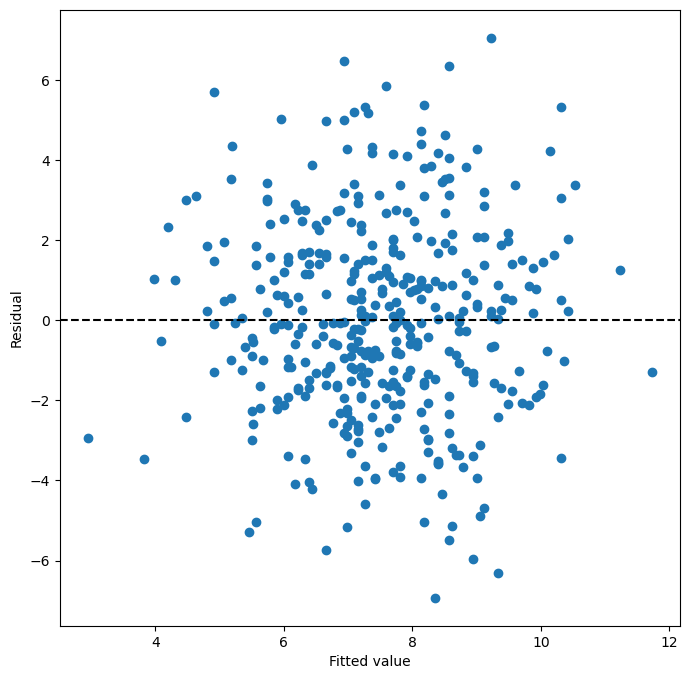

In [94]:
residual(results)

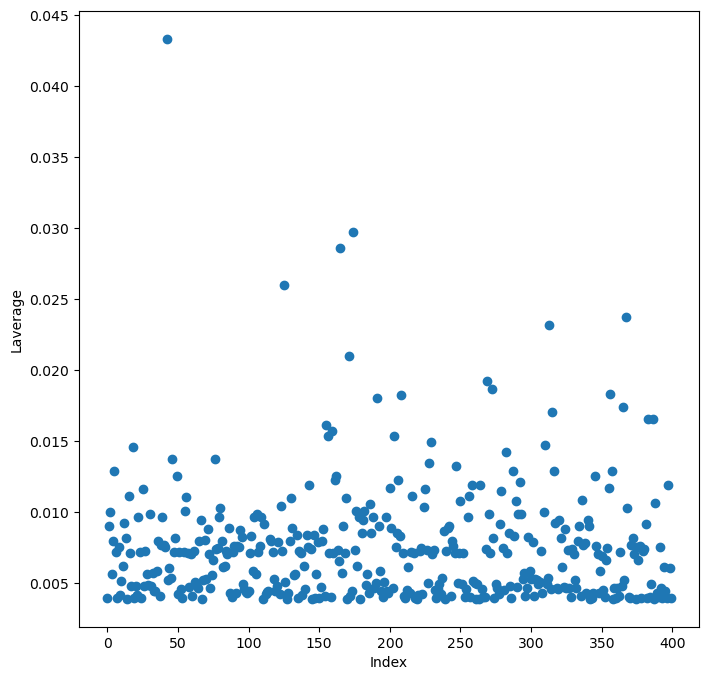

In [98]:
leverage(results)

# Question 11

In [123]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [124]:
model = sm.OLS(y, x) # specifies model
results = model.fit() # fits model
summarize(results)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [125]:
model = sm.OLS(x, y) # specifies model
results = model.fit() # fits model
summarize(results)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


# Question 13

In [151]:
np.random.seed(1)

In [166]:
rng = np.random.default_rng(1)
intercept = np.ones(100)
X = rng.normal(scale=1, size=100)

In [167]:
eps = rng.normal(scale=0.25, size=100)

In [168]:
y = -1 + 0.5*X + eps

B<sub>0</sub> = -1
B<sub>1</sub> = 0.5

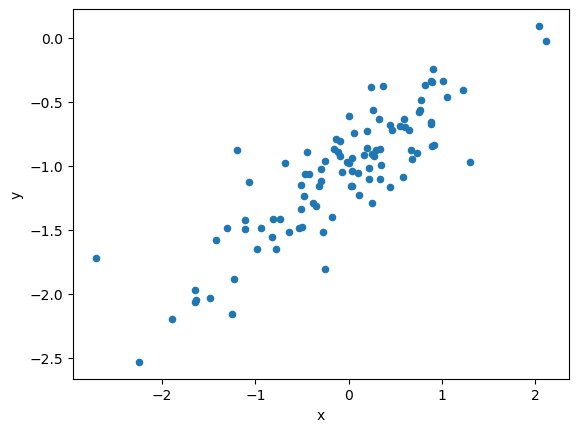

In [169]:
df = pd.DataFrame({'x': X, 'y': y})
ax = df.plot.scatter('x', 'y')

In [172]:
new_X = pd.DataFrame({'Intercept': intercept,
                 'x': X})

In [191]:
model = sm.OLS(y, new_X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
Intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


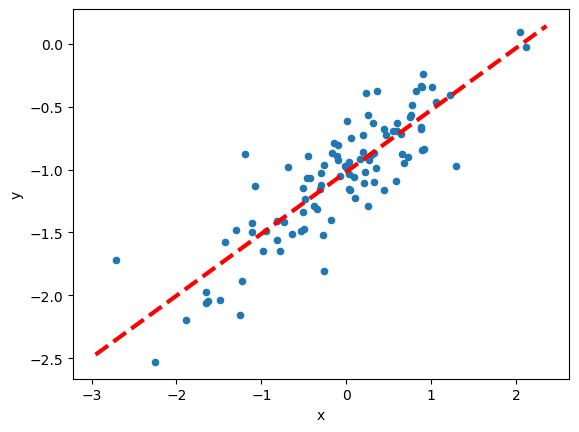

In [182]:
ax = df.plot.scatter('x', 'y')
abline(ax, 
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

In [185]:
X = MS([poly('x', degree=2)]).fit_transform(new_X)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(x, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(x, degree=2)[1]",-0.0131,0.252,-0.052,0.959


# Question 14

In [229]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [230]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

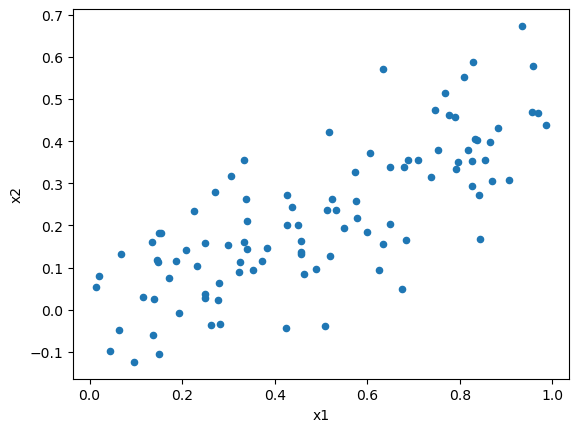

In [231]:
A = pd.DataFrame({'x1': x1, 
      'x2': x2})
ax = A.plot.scatter('x1', 'x2')

In [232]:
X = MS(['x1', 'x2']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        14:18:36   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
X = MS(['x1']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        14:18:36   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
X = MS(['x2']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        14:18:36   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

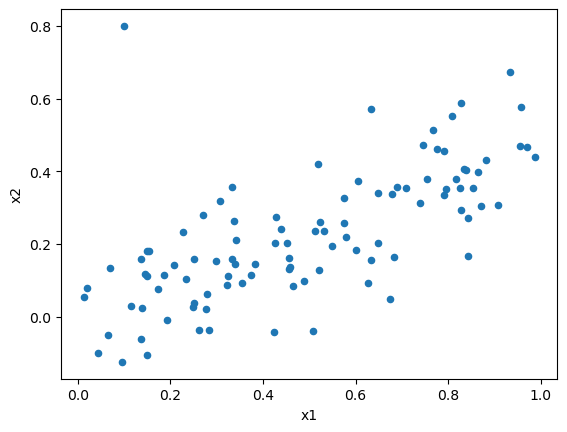

In [236]:
A = pd.DataFrame({'x1': x1, 
      'x2': x2})
ax = A.plot.scatter('x1', 'x2')

In [237]:
X = MS(['x1', 'x2']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
#results.summary()

In [238]:
X = MS(['x1']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
#results.summary()

In [239]:
X = MS(['x2']).fit_transform(A)
model = sm.OLS(y, X)
results = model.fit()
#results.summary()

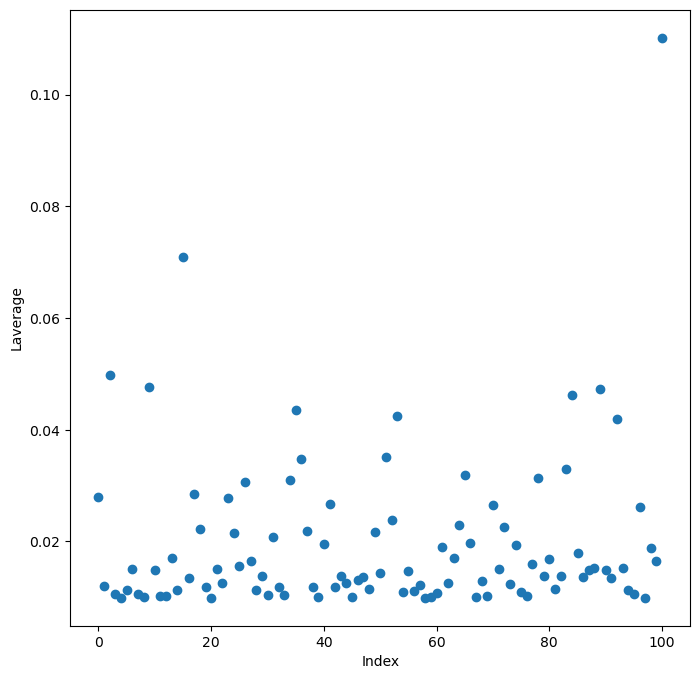

In [240]:
leverage(results)

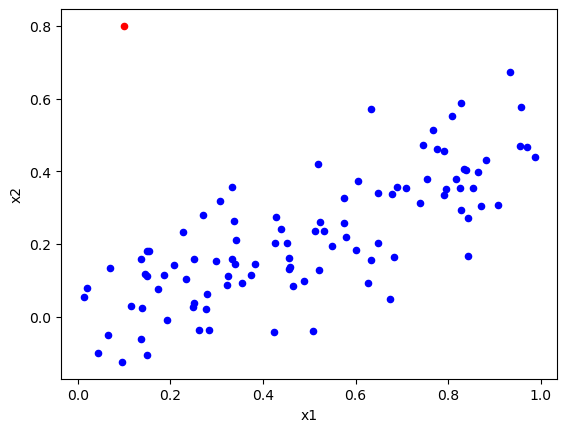

In [241]:
# Bivariate analysis (x1,x2)
sample = A.iloc[-1:]  # To get the last observation
other = A.iloc[:-1]  # To get all the observations but the last
ax = other.plot(kind='scatter',x='x1',y='x2', color='blue');  # Plot all observations but the last in blue
sample.plot(ax=ax, kind='scatter',x='x1',y='x2', color='red');  # Plot last observation added in red

# Question 15

In [243]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [249]:
y = Boston['crim']

In [250]:
terms = Boston.drop(['crim'], axis=1).columns.tolist()
terms

['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

In [254]:
for column in terms:
    X = MS([column]).fit_transform(Boston)
    model = sm.OLS(y, X)
    result = model.fit()
    print(column, '\n',summarize(result), '\n\n')

zn 
              coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0 


indus 
              coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000 


chas 
              coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209 


nox 
               coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0 


rm 
               coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0 


age 
              coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0 


dis 
              coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0 


rad 
              coef  std err       t  P>|t|
intercept -2

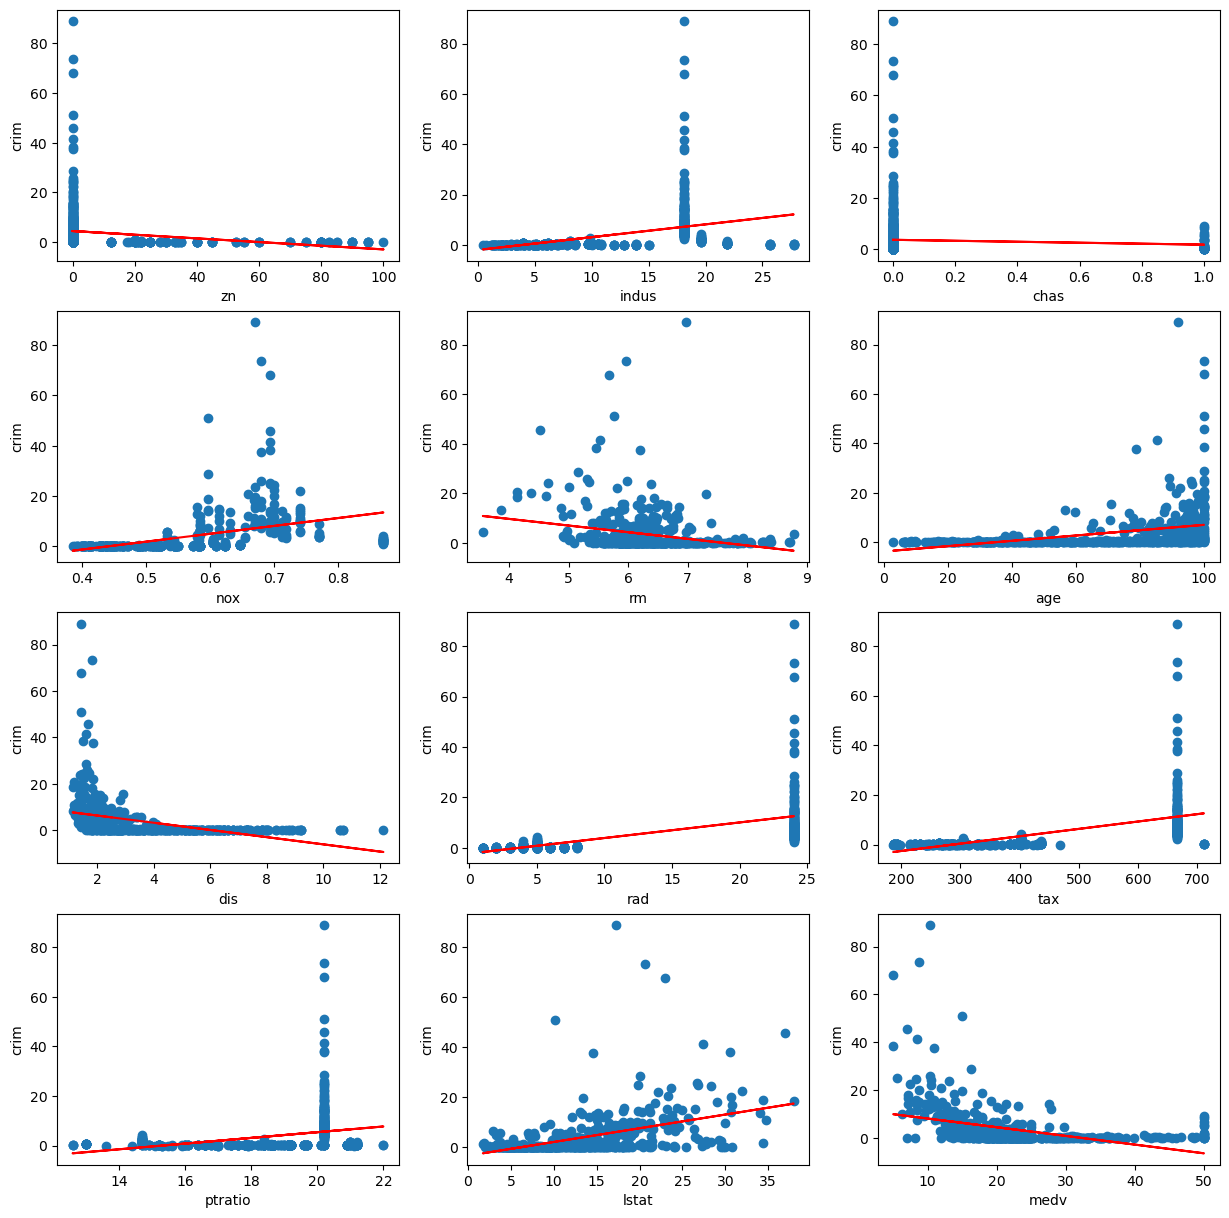

In [271]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
for i, column in enumerate(terms):
    X = MS([column]).fit_transform(Boston)
    res = sm.OLS(y, X).fit()
    plt.subplot(4,3,i+1)
    plt.xlabel(column)
    plt.ylabel("crim")
    plt.scatter(Boston[column], Boston['crim'])
    plt.plot(Boston[column], res.fittedvalues, color='red')

In [264]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
result = model.fit()
result.summary()
# dis, medv,  rad

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.03e-56
Time:                        14:44:37   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [273]:
for column in terms:
    X = MS([poly(column, degree=3)]).fit_transform(Boston)
    model = sm.OLS(y, X)
    result = model.fit()
    print(column, '\n',summarize(result), '\n\n')

zn 
                           coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230 


indus 
                              coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000 


chas 
                            coef  std err      t  P>|t|
intercept                3.6185    0.379  9.538  0.000
poly(chas, degree=3)[0] -0.1066    0.069 -1.541  0.124
poly(chas, degree=3)[1] -0.8724    0.397 -2.198  0.028
poly(chas, degree=3)[2] -0.6012    0.657 -0.915  0.361 


nox 
                            coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3